In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Session - 11/Assignment/Yolo Object Detection/')

In [27]:
import cv2
import numpy as np

In [32]:
# Load Yolo
net = cv2.dnn.readNet("/content/drive/MyDrive/Colab Notebooks/Session - 11/Assignment/Yolo Object Detection/yolov3.weights"
, "/content/drive/MyDrive/Colab Notebooks/Session - 11/Assignment/Yolo Object Detection/yolov3.cfg")
classes = []
with open("/content/drive/MyDrive/Colab Notebooks/Session - 11/Assignment/Yolo Object Detection/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [62]:
# Loading image
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Session - 11/Assignment/Yolo Object Detection/Bike_2.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [63]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [64]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

### Non MAx supression

In [65]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

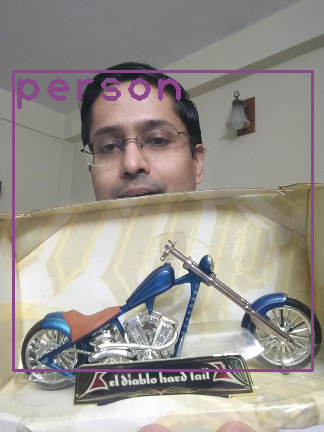

In [66]:
from google.colab.patches import cv2_imshow 
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Session - 11/Assignment/YoloV3/')

In [4]:
cd /content/drive/MyDrive/Colab Notebooks/Session - 11/Assignment/YoloV3/

/content/drive/MyDrive/Colab Notebooks/Session - 11/Assignment/YoloV3


In [5]:
!ls

 annotation_tool	      models.py      results.txt      utils
 Annotation_tool_process.py   output	     runs	      vim.exe.stackdump
 Annotation_tool.py	      __pycache__    test.py	      weights
 cfg			      README.md      ting
 data			      results.json   train.py
 detect.py		      results.png   'ubdivisions=1'


In [9]:
## Run the below in local machine
#run Annotation_tool.py
#run Annotation_tool_process.py -arg

In [ ]:
#!python train.py --data data/customdata/custom.data --batch 16 --cache --cfg cfg/yolov3-custom.cfg --epochs 130 --nosave
#!python train.py --data data/customdata/custom.data --batch 16 --cache --cfg cfg/yolov3-custom.cfg --epochs 130 --nosave --resume --cache-images

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=130, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2949 found, 131 missing, 45 empty, 0 duplicate, for 3125 images): 100% 3125/3125 [12:51<00:00,  4.05it/s]
Caching images (1.7GB): 100% 3125/3125 [24:07<00:00,  2.16it/s]
Reading image shapes: 100% 338/338 [02:19<00:00,  2.42it/s]
Caching labels (317 found, 14 missing, 7 empty, 0 duplicate, for 338 images): 100% 338/338 [02:12<00:00,  2.56it/s]
Caching images (0.1GB): 100% 338/338 [00:05<00:00, 

In [11]:
!python train.py --data data/customdata/custom.data --batch 16 --cache --cfg cfg/yolov3-custom.cfg --epochs 20 --nosave
#!python train.py --data data/customdata/custom.data --batch 16 --cache --cfg cfg/yolov3-custom.cfg --epochs 130 --nosave --resume --cache-images

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=20, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2949 found, 131 missing, 45 empty, 0 duplicate, for 3125 images): 100% 3125/3125 [00:04<00:00, 685.94it/s]
Caching images (1.7GB): 100% 3125/3125 [00:35<00:00, 87.01it/s]
Caching labels (317 found, 14 missing, 7 empty, 0 duplicate, for 338 images): 100% 338/338 [00:00<00:00, 698.95it/s]
Caching images (0.1GB): 100% 338/338 [00:04<00:00, 73.27it/s]
Image sizes 512 - 512 train, 512 test
Using 2 da

In [1]:
#!python train.py --data data/customdata/custom.data --batch 16 --cache --cfg cfg/yolov3-custom.cfg --epochs 10 --nosave --resume --cache-images

python3: can't open file 'train.py': [Errno 2] No such file or directory


In [ ]:
pause

In [12]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/3686 data/customdata/images/01-prince-boots - Copy.jpg: 512x448 1 masks, 2 bootss, Done. (0.020s)
image 2/3686 data/customdata/images/026f0ffddc.jpg: 384x512 1 masks, Done. (0.021s)
image 3/3686 

In [17]:
from IPython.display import Image, clear_output 


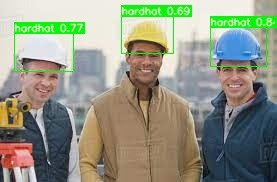

In [19]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/HHat2.jpg', width=600)

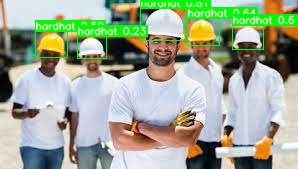

In [25]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/HHat3.jpg', width=600)

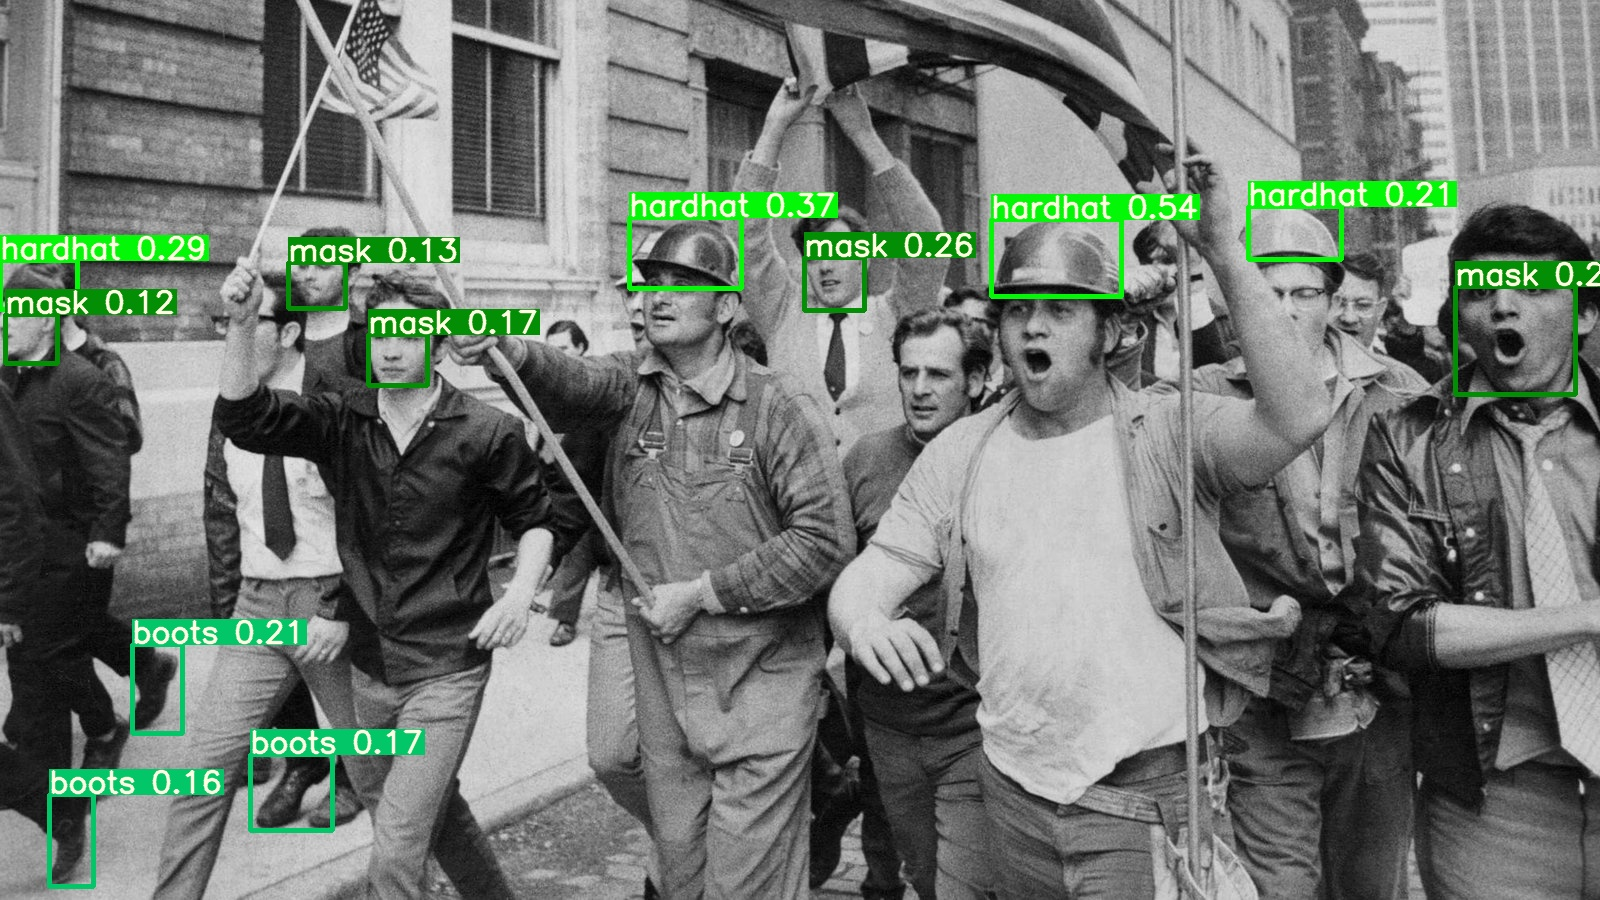

In [27]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/HHat19.jpg', width=600)

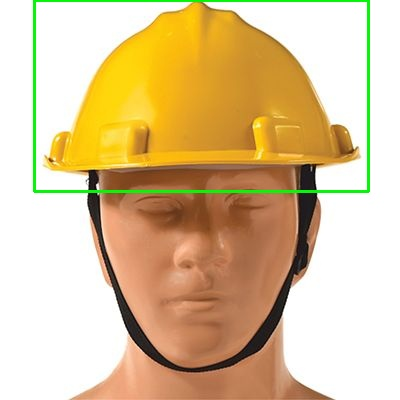

In [28]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/HHat15.jpg', width=600)

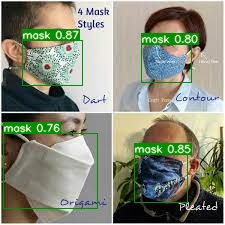

In [29]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Masks5.jpg', width=600)

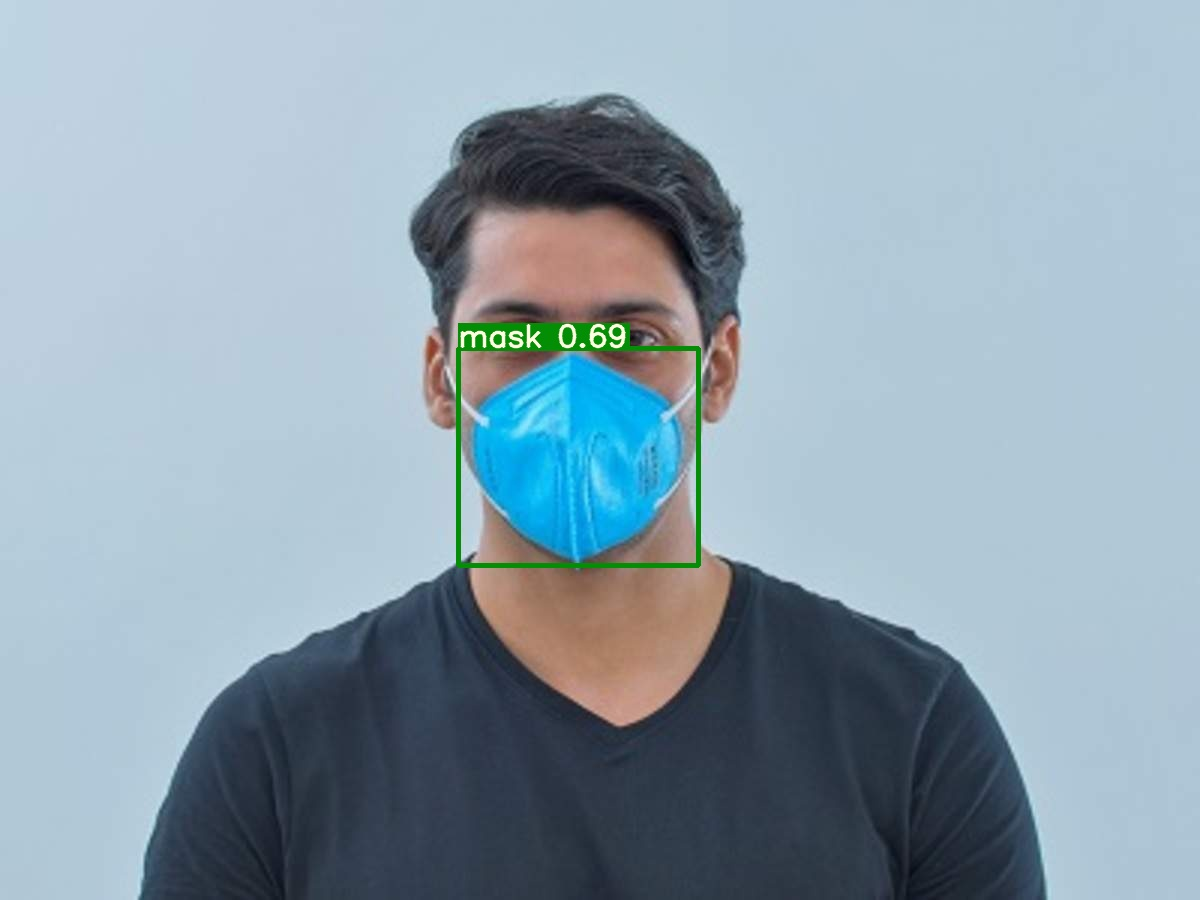

In [30]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Masks6.jpg', width=600)

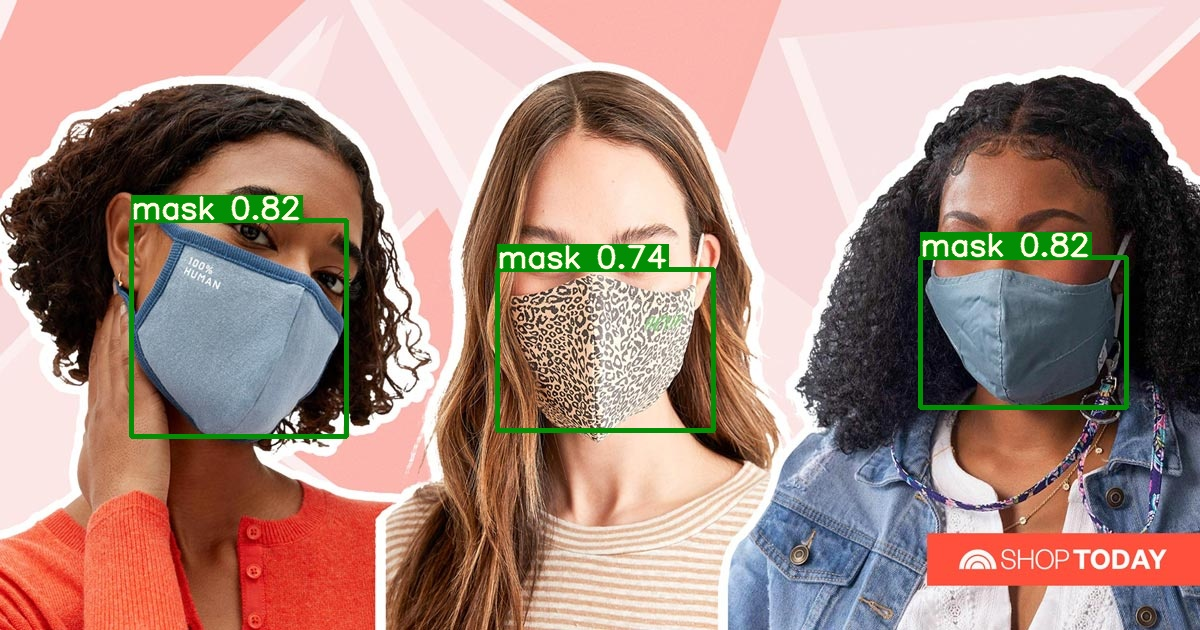

In [31]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Masks11.jpg', width=600)

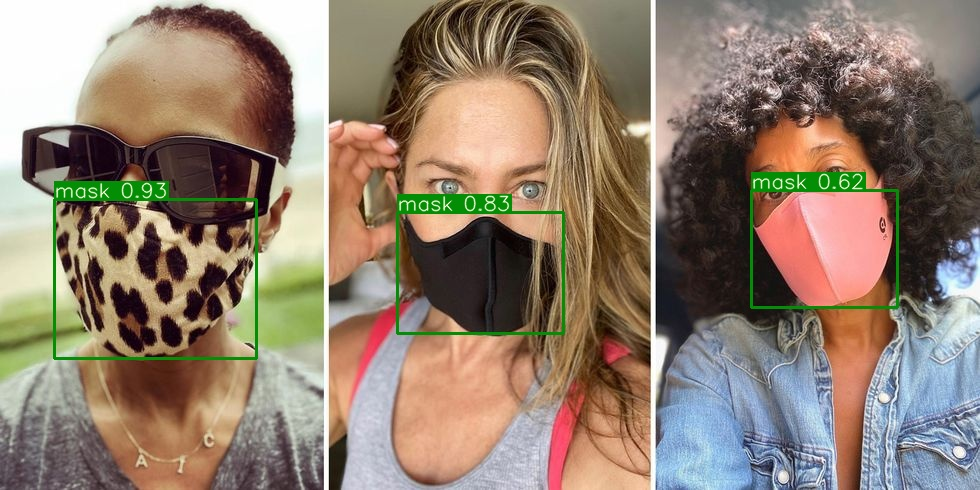

In [32]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Masks12.jpg', width=600)

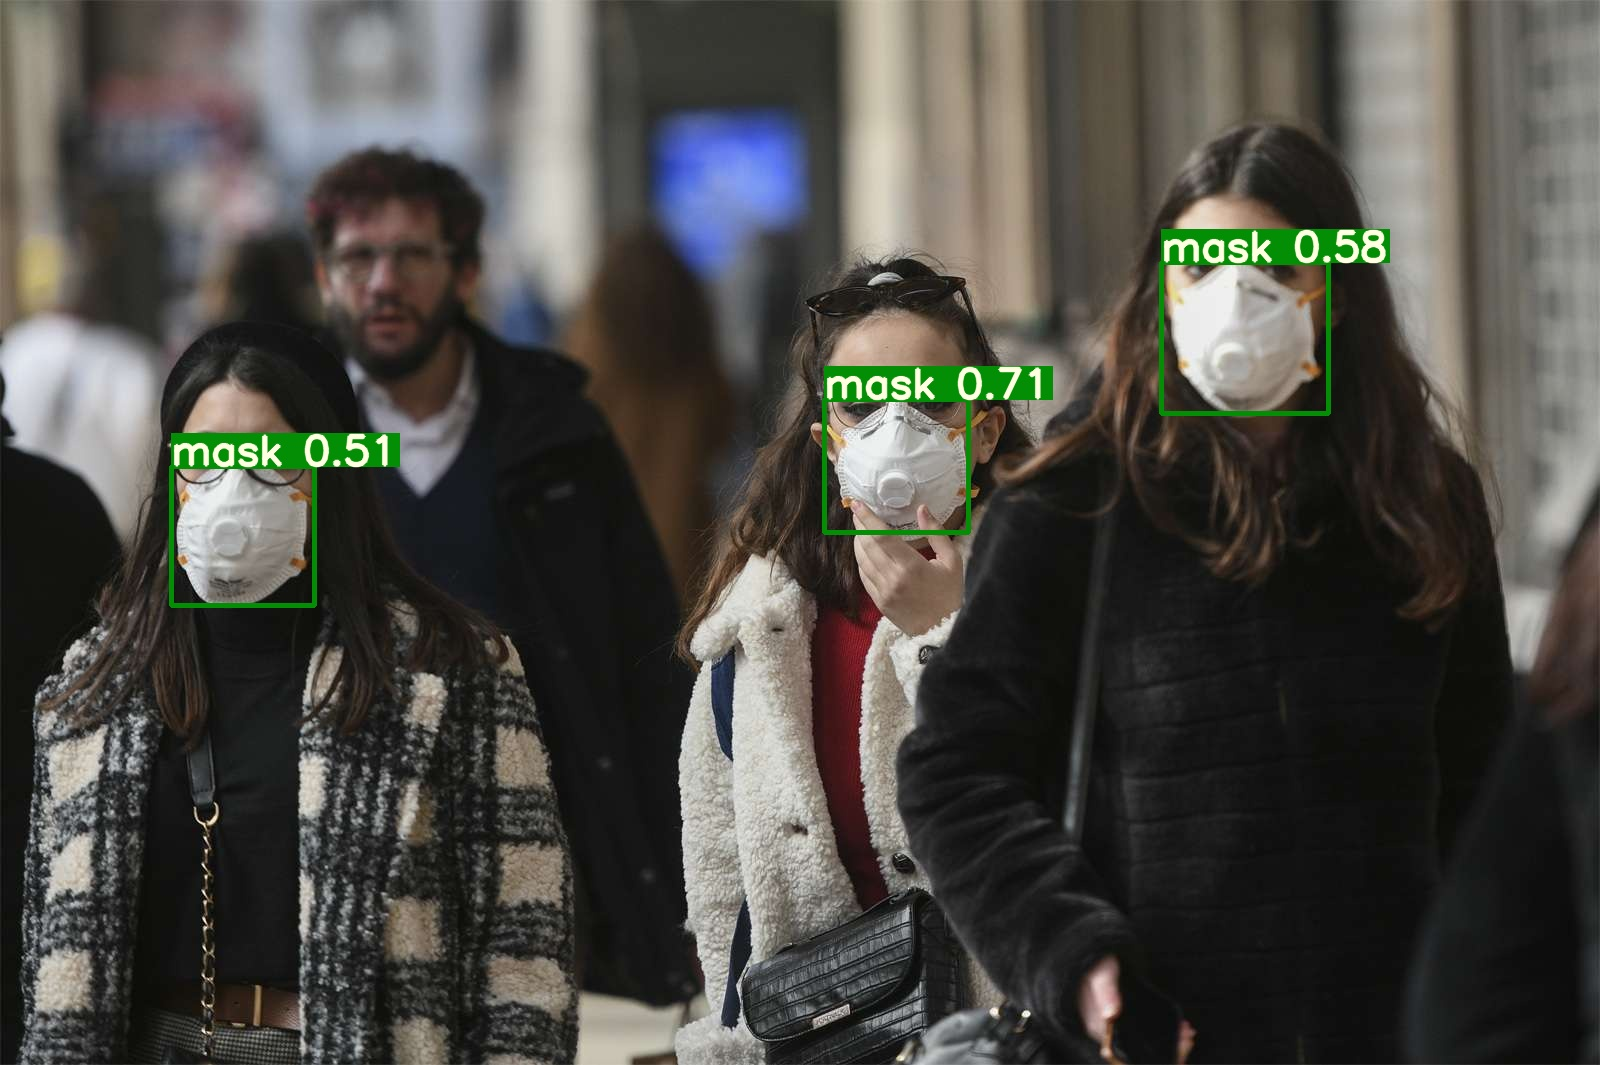

In [21]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Masks22.jpg', width=600)

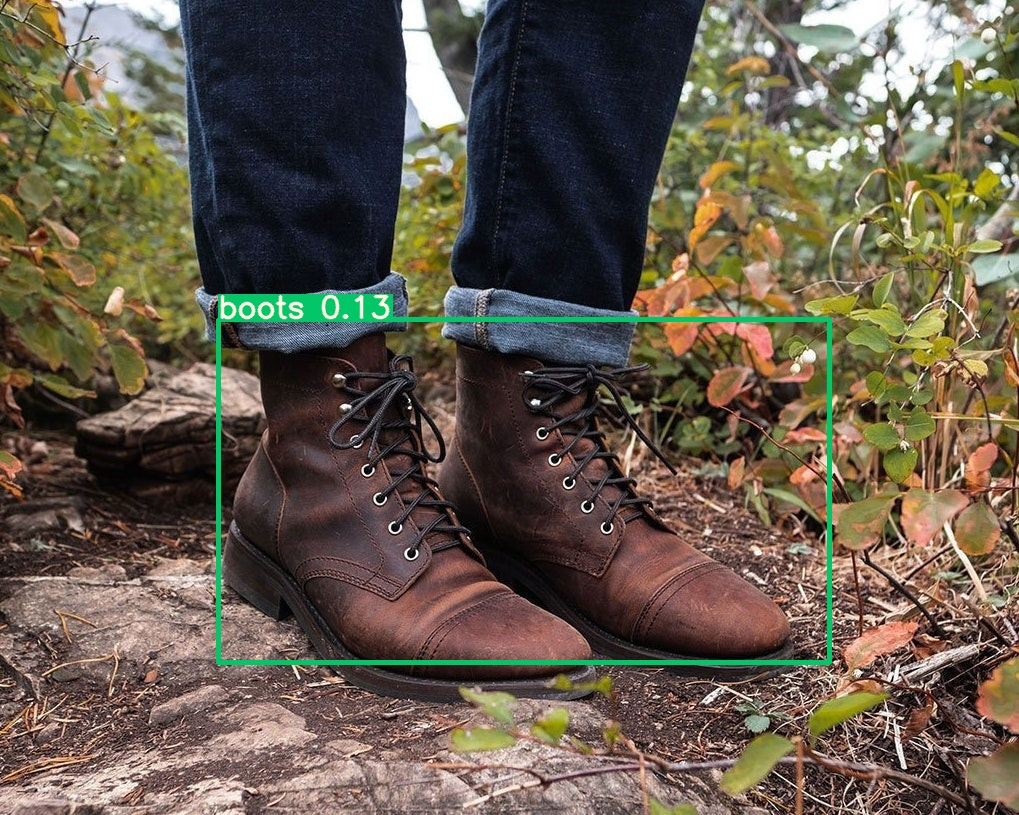

In [23]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Boots14.jpg', width=600)

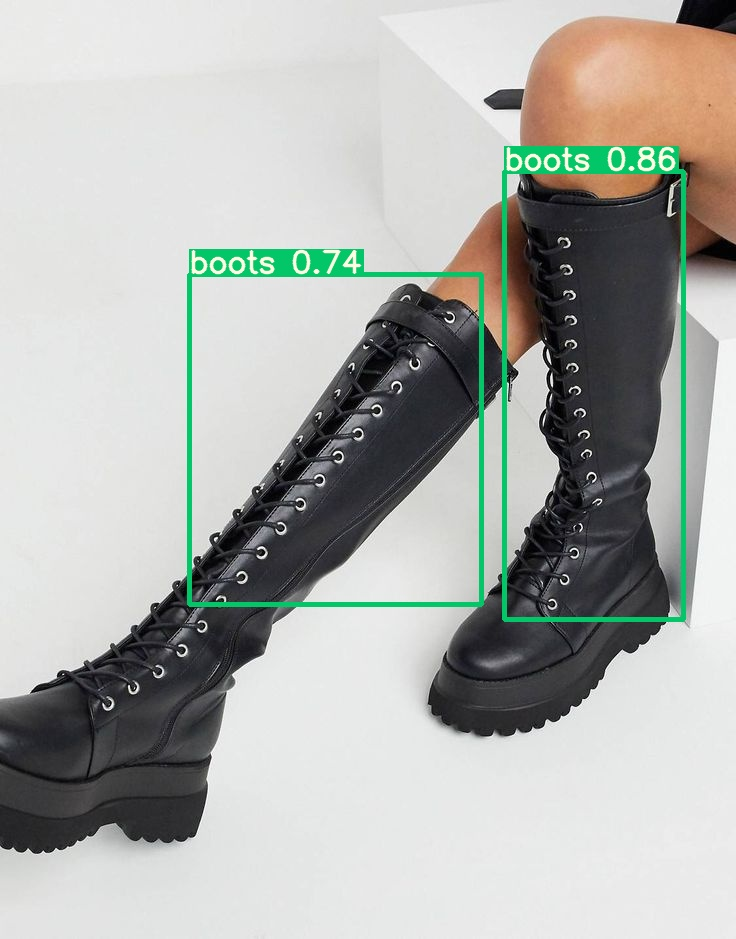

In [33]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Boots4.jpg', width=600)

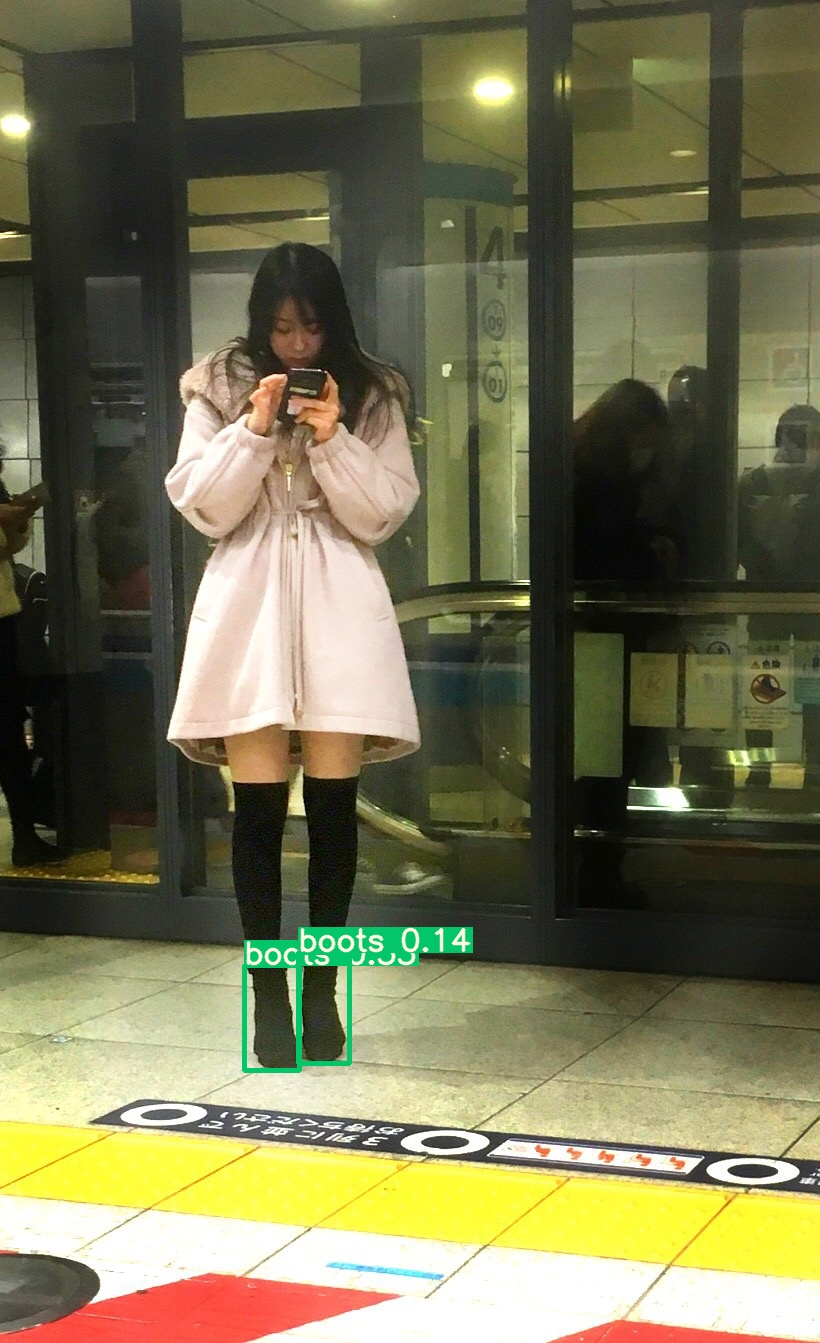

In [36]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Boots11.jpg', width=600)

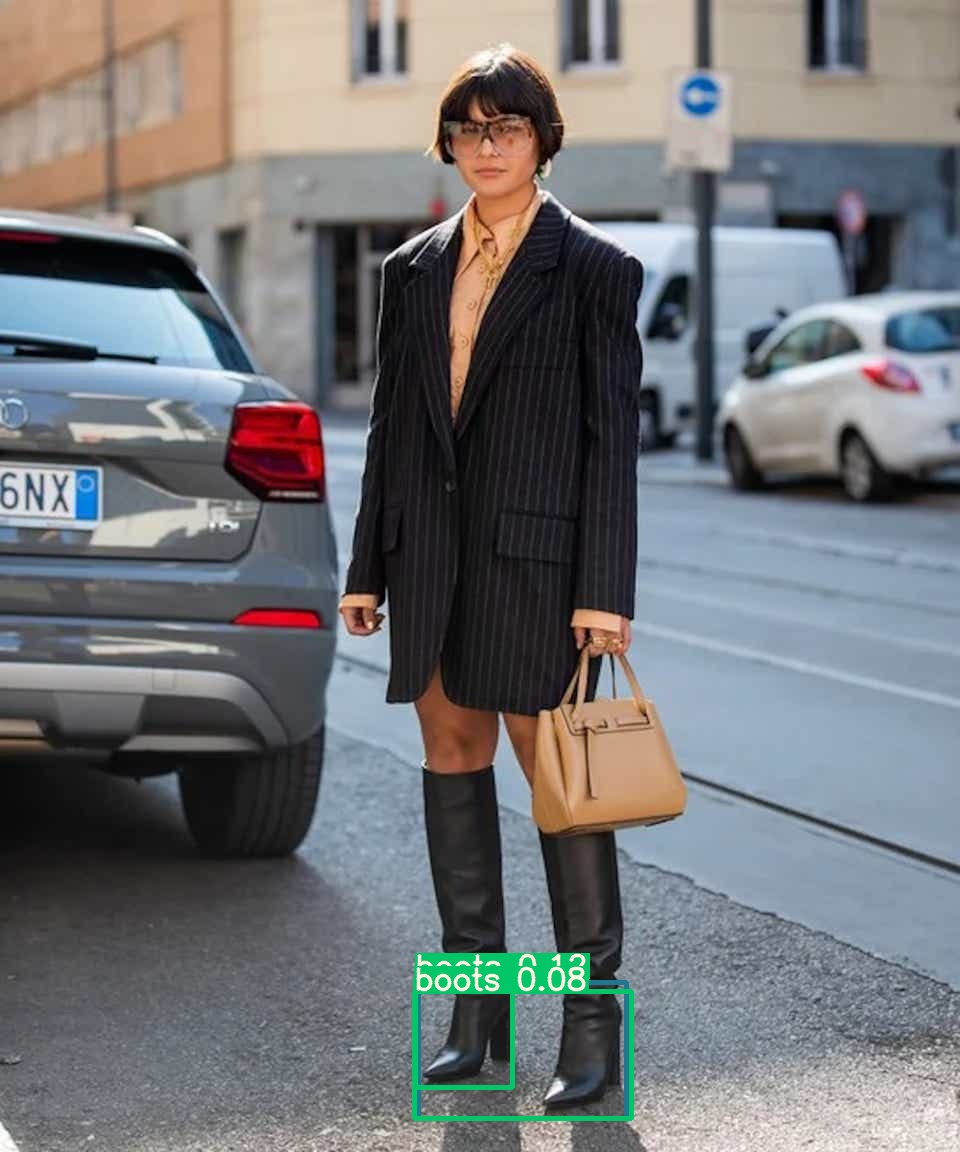

In [37]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Boots12.jpg', width=600)

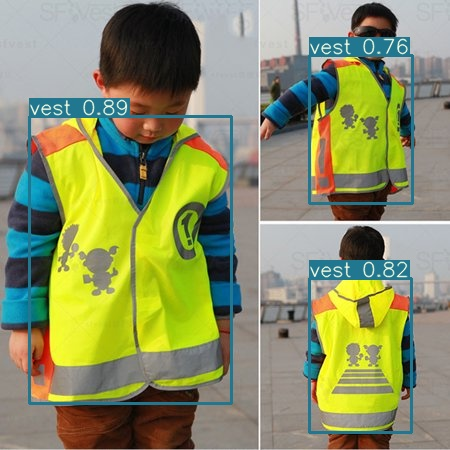

In [24]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Vest10.jpg', width=600)

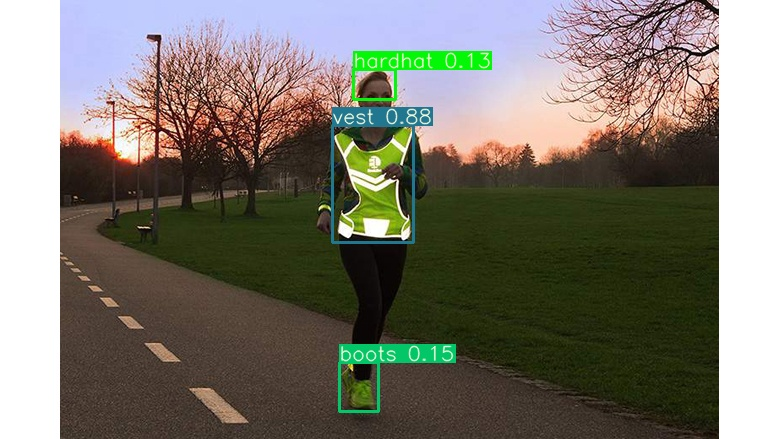

In [38]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Vest11.jpg', width=600)

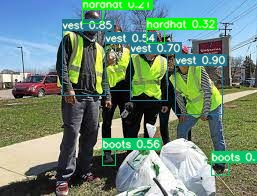

In [39]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Vest12.jpg', width=600)

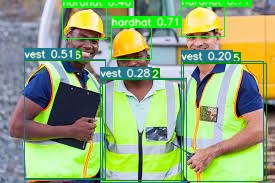

In [40]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Session - 11/Assignment/YoloV3/out_out/Vest13.jpg', width=600)